In [ ]:
#pta-000
#pta-001
#pta-111
#import necessary libraries
#numpy - for numerical computing
#pandas - data handling
#seaborn & matplotlib - plotting data
# google.colab - to upload files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving laptop_prices.csv to laptop_prices (1).csv


In [ ]:
# read the data set & preview the first rows
df=pd.read_csv('laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
# check infos like null values & columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
# to detect missing values
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
# sanity check of data
#df.duplicated().sum()
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts)
  print("***"*10)

<bound method IndexOpsMixin.value_counts of 0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1270    Lenovo
1271    Lenovo
1272    Lenovo
1273        HP
1274      Asus
Name: Company, Length: 1275, dtype: object>
******************************
<bound method IndexOpsMixin.value_counts of 0                               MacBook Pro
1                               Macbook Air
2                                    250 G6
3                               MacBook Pro
4                               MacBook Pro
                       ...                 
1270                         Yoga 500-14ISK
1271                         Yoga 900-13ISK
1272                     IdeaPad 100S-14IBR
1273    15-AC110nv (i7-6500U/6GB/1TB/Radeon
1274    X553SA-XX031T (N3050/4GB/500GB/W10)
Name: Product, Length: 1275, dtype: object>
******************************
<bound method IndexOpsMixin.value_counts of 0                Ultrabook
1                Ultrabook
2              

In [ ]:
# duplicate values treatments
df.drop_duplicates()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [ ]:
# EDA descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4
Ram,1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0
Weight,1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7
Price_euros,1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0
ScreenW,1275.0,1900.043922,493.346186,1366.00,1920.0,1920.00,1920.00,3840.0
ScreenH,1275.0,1073.904314,283.883940,768.00,1080.0,1080.00,1080.00,2160.0
CPU_freq,1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6
PrimaryStorage,1275.0,444.517647,365.537726,8.00,256.0,256.00,512.00,2048.0
SecondaryStorage,1275.0,176.069020,415.960655,0.00,0.0,0.00,0.00,2048.0


In [ ]:
# EDA
df.describe(include="object")

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,9,4,2,2,2,3,93,4,4,4,110
top,Dell,XPS 13,Notebook,Windows 10,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
freq,291,30,707,1048,835,1087,918,1258,1214,193,837,1067,704,279


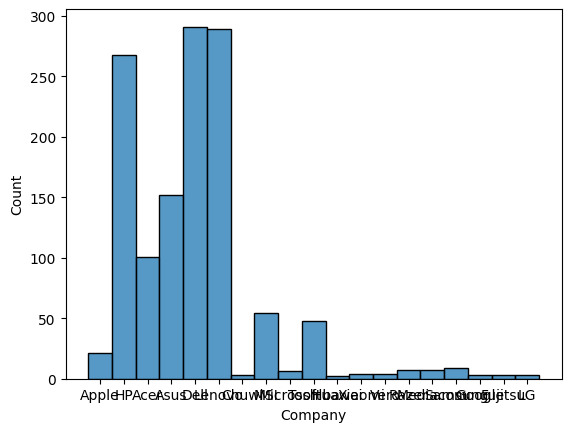

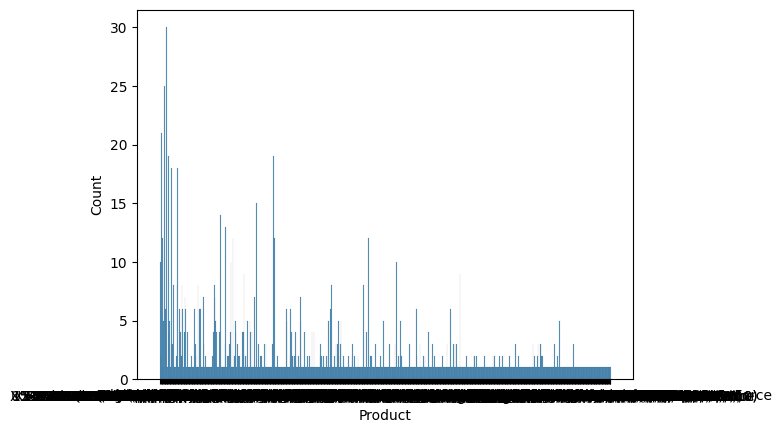

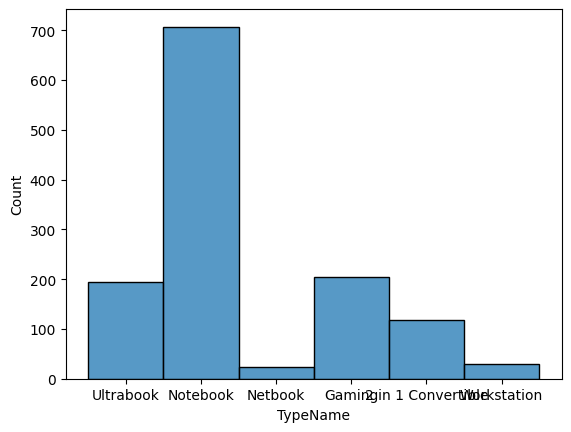

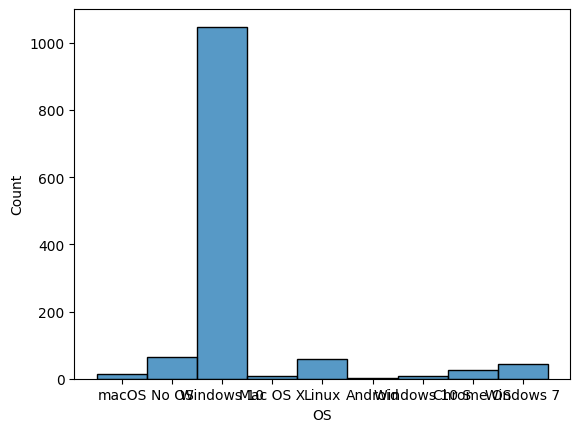

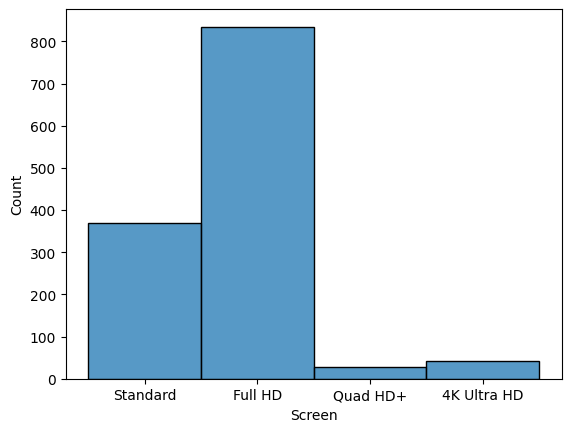

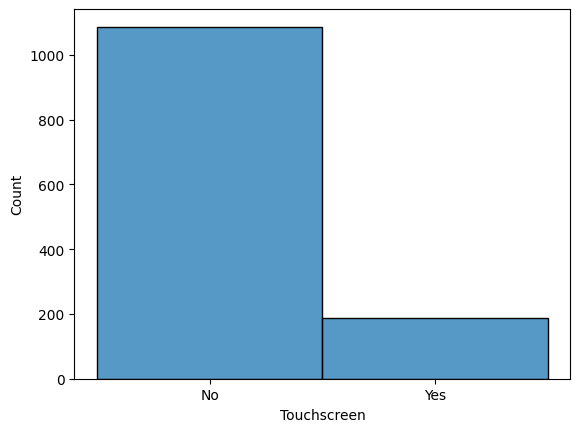

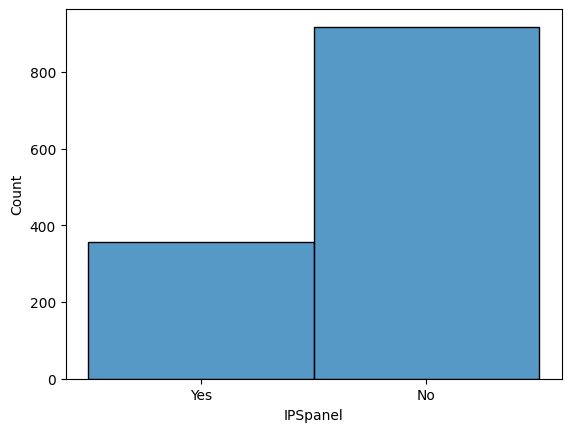

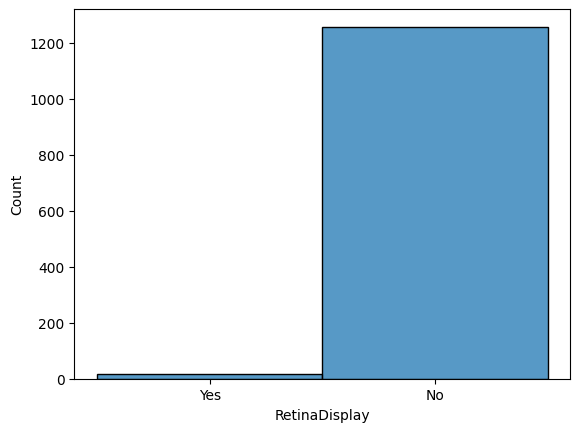

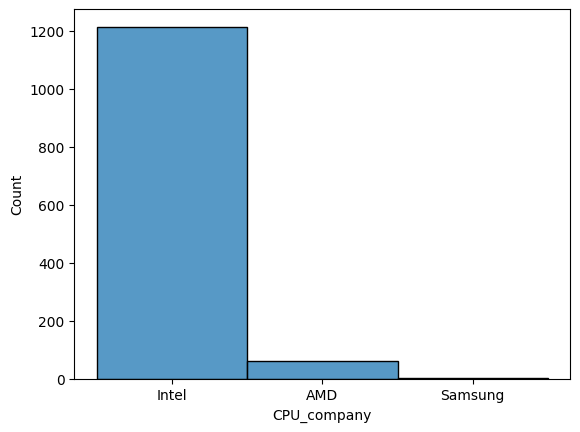

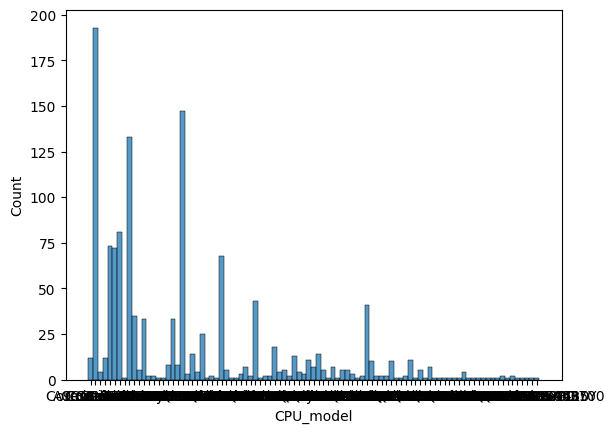

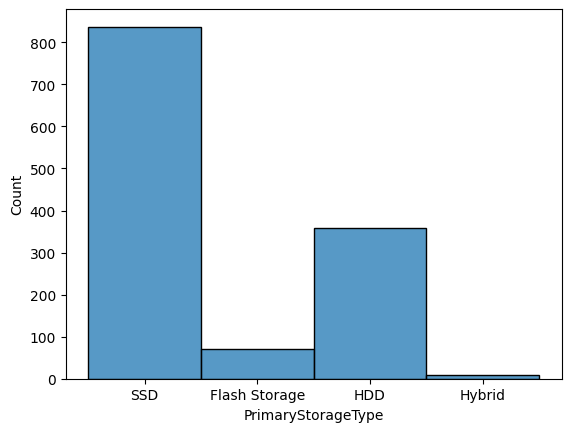

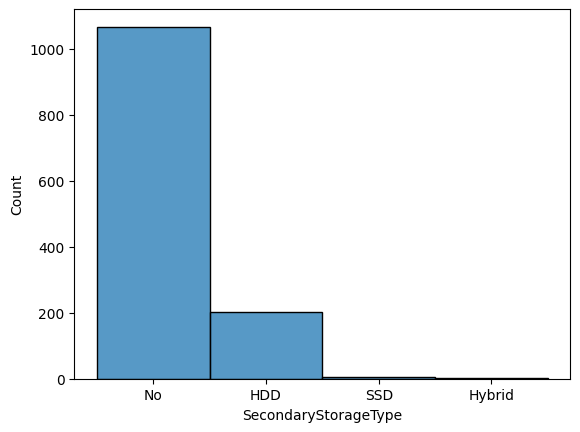

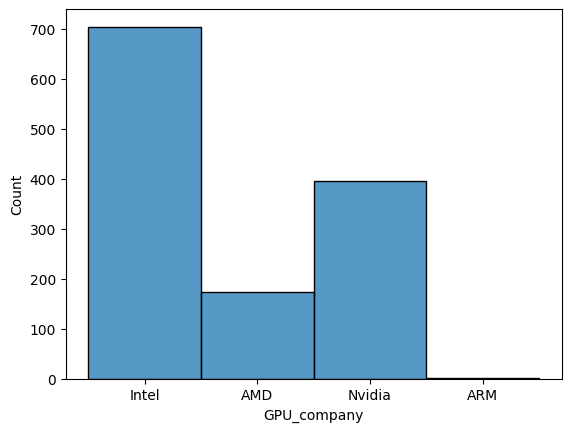

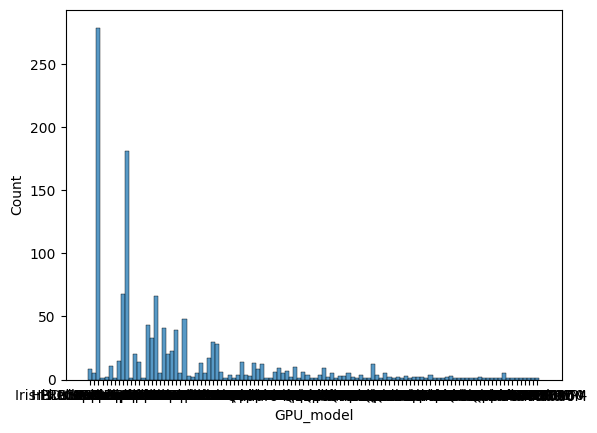

In [ ]:
# EDA histogram to understand the distribution
for i in df.select_dtypes(include="object").columns:
  sns.histplot(df[i])
  plt.show()

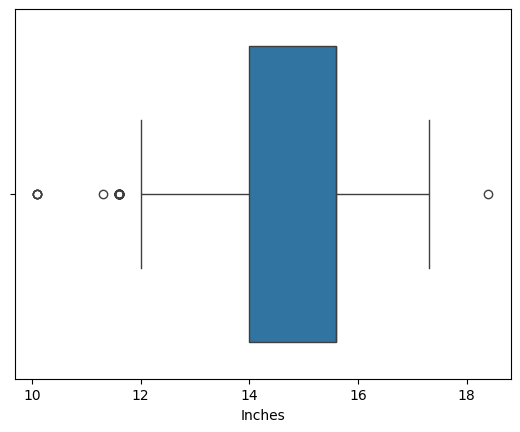

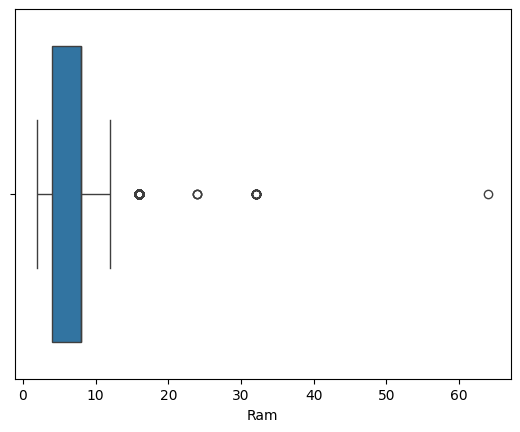

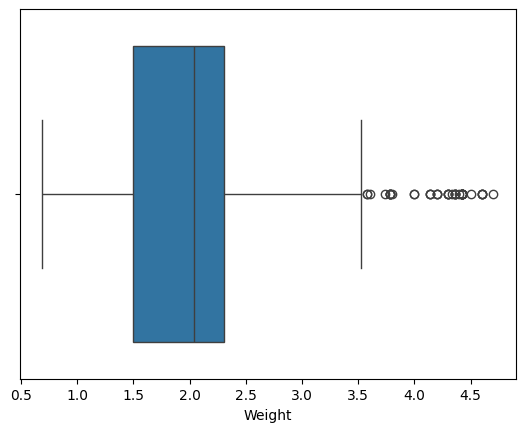

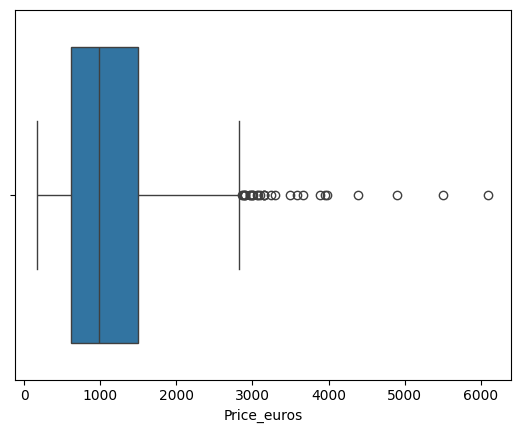

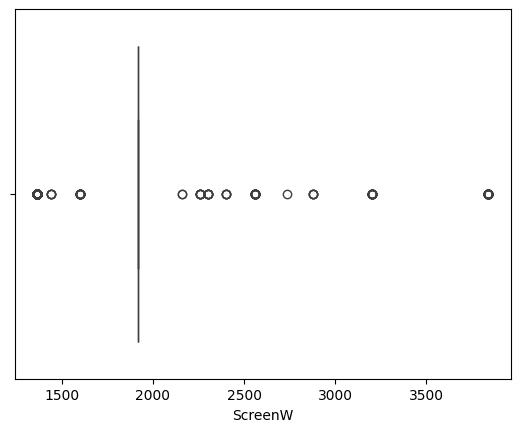

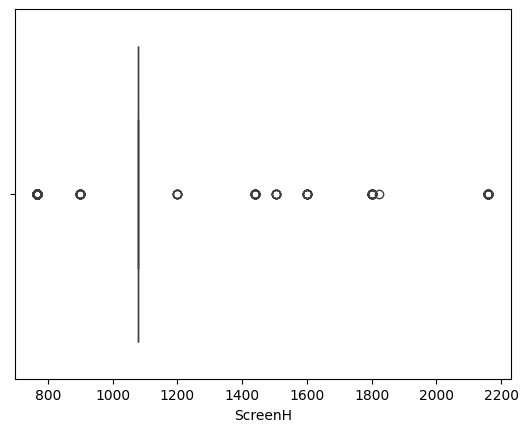

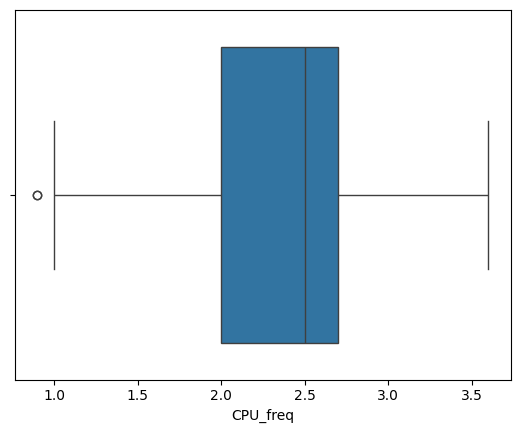

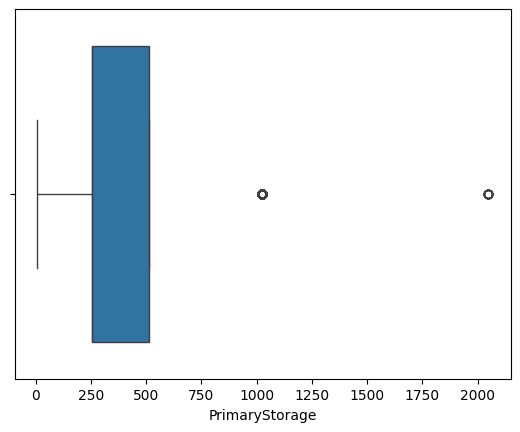

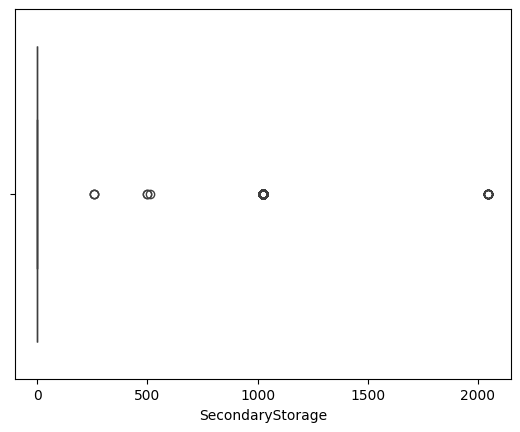

In [ ]:
# EDA boxplot to identify outliers
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df,x=i)
  plt.show()

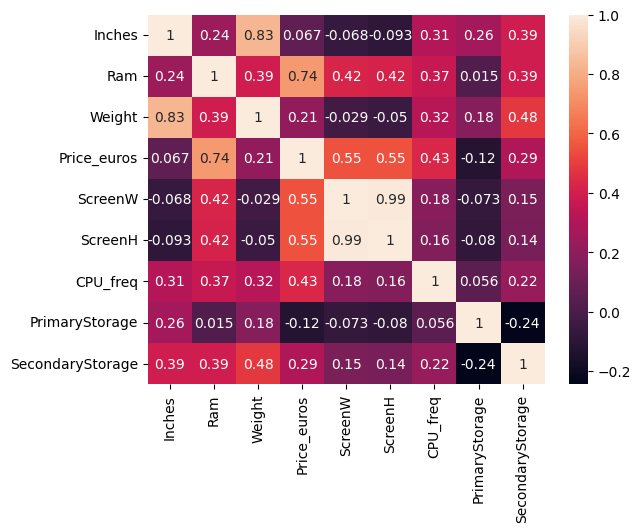

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# EDA correlation to interpret the relation & multicolliniarity
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True)
plt.figure(figsize=(15,15))
plt.show()

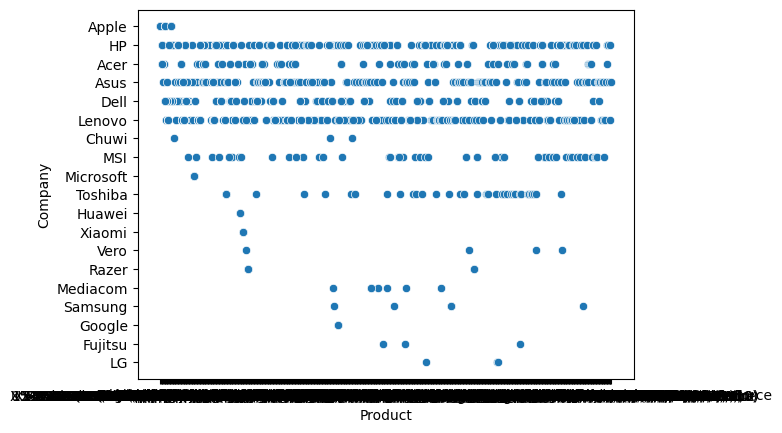

In [ ]:
for i in ['Product']:
  sns.scatterplot(data=df,x=i,y='Company')
  plt.show()

In [ ]:
# encoding of categorical data
pd.get_dummies(data=df , columns=['Company','Product' , 'OS' , 'TypeName' , 'PrimaryStorageType' , 'SecondaryStorageType' , 'GPU_company'] , drop_first=True)

,Inches,Ram,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,...,TypeName_Workstation,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,-1.205746,-0.086499,-1.002380,0.292259,Standard,1.338239,1.853934,No,Yes,Yes,...,False,False,False,True,False,True,False,False,True,False
1,-1.205746,-0.086499,-1.047227,-0.336954,Standard,-0.932863,-0.612830,No,No,No,...,False,False,False,False,False,True,False,False,True,False
2,0.403873,-0.086499,-0.269871,-0.799410,Full HD,0.040466,0.021481,No,No,No,...,False,False,False,True,False,True,False,False,True,False
3,0.263906,1.483418,-0.314718,2.002178,Standard,1.987125,2.558724,No,Yes,Yes,...,False,False,False,True,False,True,False,False,False,False
4,-1.205746,-0.086499,-1.002380,0.954536,Standard,1.338239,1.853934,No,Yes,Yes,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,-0.715862,-0.871458,-0.359566,-0.709472,Full HD,0.040466,0.021481,Yes,Yes,No,...,False,False,False,True,False,True,False,False,True,False
1271,-1.205746,1.483418,-1.107024,0.519690,Quad HD+,2.636011,2.558724,Yes,Yes,No,...,False,False,False,True,False,True,False,False,True,False
1272,-0.715862,-1.263937,-0.808041,-1.293359,Standard,-1.082918,-1.077991,No,No,No,...,False,False,False,False,False,True,False,False,True,False
1273,0.403873,-0.478979,0.223452,-0.529594,Standard,-1.082918,-1.077991,No,No,No,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns

df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Handling Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)

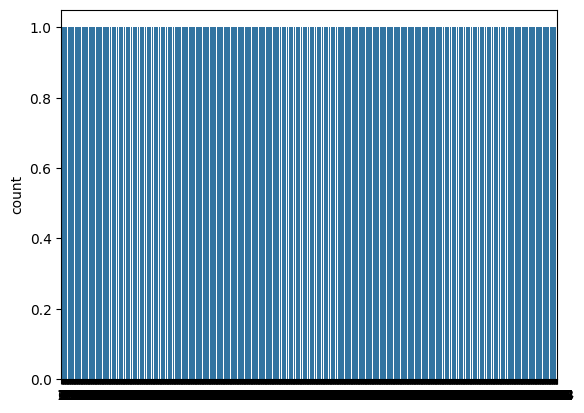

In [ ]:
# target column is 'SecondaryStorage'to apply imbalance
df['SecondaryStorage'].value_counts()
# Visualize
sns.countplot(df['SecondaryStorage'])
plt.show()

In [ ]:
# Target
y = df['SecondaryStorage']

# Features (everything except target)
X = df.drop(columns=['SecondaryStorage'])

In [ ]:
# coudnt apply the imbalance here because its a continuous data & its regression dataset and the imbalance except discrete values &n apply it on classification problem

In [ ]:
# create 3 price groups using quantiles
df['Price'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])

df['Price_Category'].value_counts()

# Laptop Prices EDA & Feature Engineering Documentation

This notebook performs a full exploratory data analysis (EDA) and preprocessing for a laptop prices dataset, preparing it for machine learning tasks.

## 1. Importing Libraries
We import `numpy` for numerical computations, `pandas` for data handling, `seaborn` and `matplotlib` for visualization, and `google.colab.files` to upload files in Google Colab.

## 2. Uploading and Reading the Dataset
The CSV file is uploaded and read into a pandas DataFrame. The first 5 rows are previewed to understand the structure.

## 3. Dataset Inspection
We check column data types, count of missing values, and duplicates to identify any data cleaning needs.

## 4. Exploring Categorical Columns
All object-type columns are explored with `value_counts()` to understand the distribution of categories and detect inconsistent values.

## 5. Removing Duplicates
Duplicate rows are removed to ensure data integrity.

## 6. Descriptive Statistics
- Numeric columns: `describe()` provides mean, median, standard deviation, min, max, and quartiles.
- Categorical columns: `describe(include='object')` provides counts of unique values and top categories.

## 7. Exploratory Data Analysis (EDA)
### 7.1 Histograms
Histograms are plotted for categorical columns to visualize frequency distribution.

### 7.2 Boxplots
Boxplots for numeric columns are plotted to detect outliers.

### 7.3 Correlation Matrix
A heatmap of numeric feature correlations helps understand relationships and multicollinearity.

### 7.4 Scatter Plot Example
A scatter plot shows relationships between two categorical features, like Product vs Company.

## 8. Handling Missing Values
Numeric missing values are filled with median values to avoid bias from outliers.

## 9. Encoding Categorical Variables
Categorical variables are converted into numerical format using one-hot encoding (`get_dummies`), with `drop_first=True` to avoid multicollinearity.

## 10. Scaling Numeric Features
StandardScaler is applied to numeric columns to normalize them (mean=0, std=1) for better model performance.

## 11. Target and Features
The target variable is `SecondaryStorage`. All other columns are treated as features for modeling.

## 12. Creating Price Categories
The `Price` column is divided into three categories (Low, Medium, High) using quantiles. This is useful for classification tasks.

## 13. Feature Engineering
- Creating `Total_Storage` by summing Primary and Secondary Storage
- Ratio of SSD to HDD
- Log-transforming skewed features
- Interaction features between CPU, RAM, and GPU

Overall, this notebook documents each step of EDA, preprocessing, feature engineering, and prepares the dataset for machine learning tasks.
